### Computational explorations in modern number theory: the Green–Tao theorem and the abc conjecture

##### [Hiroyuki Chihara](https://fiomfd.github.io/) (University of the Ryukyus, Okinawa Island, Japan)
##### [ATCM](https://atcm.mathandtech.org/) 2025, 13-16 December 2025, [Ateneo de Manila University](https://www.ateneo.edu/)

In [1]:
using LaTeXStrings
using CSV
using Primes
using DataFrames
using InvertedIndices
using Images
using ImageView
using Plots
using LinearAlgebra

### The Prime Number Theorem

In his work Elements, Euclid first proved that there exist infinitely many prime numbers in c.300 BC. 

For $x>1$, the number of primes less than or equal to $x$ is denoted by $\pi(x)$. Euclid's theorem implies that $\pi(x) \rightarrow \infty$ ($x \rightarrow \infty$).

The Prime Number Theorem provides the behavior of $\pi(x)$ as $x\rightarrow \infty$ and the information of the distribution of primes:

$\pi(x) \bigg/ \dfrac{x}{\log{x}} 
\rightarrow 1
\quad
(x \rightarrow \infty).$

In 1896, the Prime Number Theorem was proved by Jacques Hadamard and Charles Jean de la Vallée-Poussin independently.

The following graphs visualize 
- The difference $\pi(x) - \dfrac{x}{\log{x}} \rightarrow \infty$ as $x \rightarrow \infty$.

- The convergence of $\pi(x) \bigg/ \dfrac{x}{\log{x}}$ is very slow. 

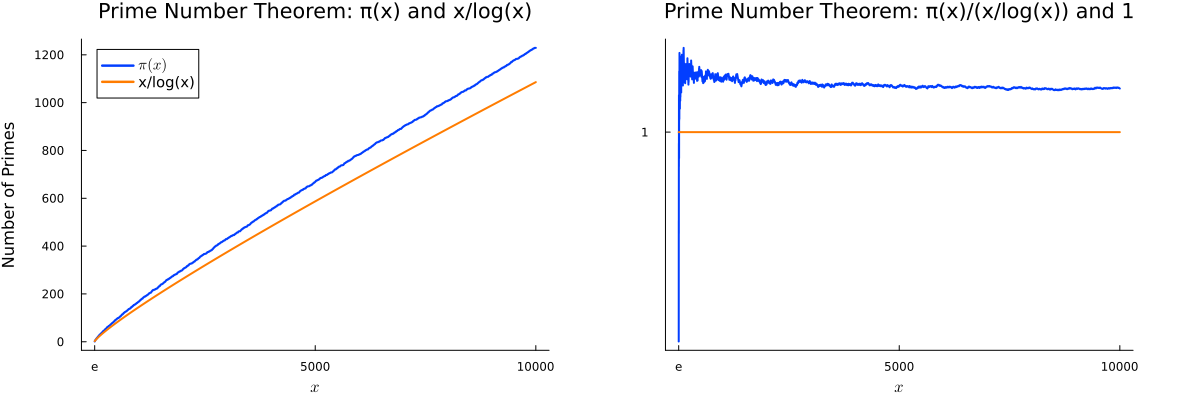

In [2]:
P1=zeros(10000);
P1[1]=1;
P1[2]=1;
L1=zeros(10000);
L1[1]=3/log(3);
L1[2]=3/log(3);
N1=zeros(10000);
N1[1]=1;
N1[2]=2;
Q1=ones(10000);

for i=3:10000
    A1=zeros(i);
    for j=1:i
        A1[j]=Float64(isprime(j));
    end
    P1[i]=sum(A1);
    L1[i]=i/log(i);
    N1[i]=i;
end

p1=plot([P1 L1],  
        grid=false,
        linewidth=2, 
        title="Prime Number Theorem: π(x) and x/log(x)", 
        right_margin=Plots.Measures.Length(:mm, 10.0),
        left_margin=Plots.Measures.Length(:mm, 5.0),
        xlabel=L"x",
        xticks = ([1 5000 10000;], ["e",5000,10000]),
        yaxis="Number of Primes",
        legendfont=font(10), 
        label=[L"\pi(x)" "x/log(x)"],
        palette = :seaborn_bright, 
        legend = :topleft)
#savefig("pnt1.png") 

p2=plot([P1./L1 Q1],  
        grid=false,
        linewidth=2, 
        title="Prime Number Theorem: π(x)/(x/log(x)) and 1", 
        right_margin=Plots.Measures.Length(:mm, 10.0),
        left_margin=Plots.Measures.Length(:mm, 5.0),
        xlabel=L"x",
        xticks = ([1 5000 10000;], ["e",5000,10000]),
        yaxis="",
        yticks = ([0 1;], [0,1]),
        label = :false,
        palette = :seaborn_bright, 
        legend = :topright)
#savefig("pnt2.png") 

plot(p1, p2,
     layout=(1,2), 
     size=(1200,400), 
     left_margin=Plots.Measures.Length(:mm, 5.0),
     right_margin=Plots.Measures.Length(:mm, 15.0),
     top_margin=Plots.Measures.Length(:mm, 5.0),
     bottom_margin=Plots.Measures.Length(:mm, 5.0))
    #savefig("pnt.png") 

### The Green-Tao Theorem

In 2004 Ben Green and Terence Tao proved the following historical theorem in number theory: 

#### *The prime numbers contain infinitely many arithmetic progressions of length $k$ for all $k$.*

The original paper is [here](https://doi.org/10.4007/annals.2008.167.481).

We explore such arithmetic progressions $\{x_n\}_{n=1}^k$ using Julia.  
Note that 
- If $x_1=2$, then $k\leqq2$. 
- If $x_1\ne2$, then the common difference of successive members is even. 
- If the final digit of $x_1$ is $5$, then $k\leqq5$ since $5+2c\times5$ is not a prime.
- If the final digit of $x_1$ is $1,3,7,9$ and thefinal digit of the common difference is $2,4,6,8$, then $k\leqq4$. Indeed

$2\times1=2, \quad 2\times2=4, \quad 2\times3=6, \quad 2\times4=8 \quad\text{mod}\quad 10,$
$4\times1=4, \quad 4\times2=8, \quad 4\times3=2, \quad 4\times4=6 \quad\text{mod}\quad 10,$
$6\times1=6, \quad 6\times2=2, \quad 6\times3=8, \quad 6\times4=4 \quad\text{mod}\quad 10,$
$8\times1=8, \quad 8\times2=6, \quad 8\times3=4, \quad 8\times4=2 \quad\text{mod}\quad 10,$
$1+4=0, \quad 3+2=0, \quad 7+8=0, \quad 9+6=0 \quad\text{mod}\quad 5.$

So we investigate such arithmetic progressions of the form:

$x_n=(a+10b)+10c\times(n-1), \quad n=1,2,3,\dotsc,k,$

where $x_1=a+10b$ is the first term, $10c$ is the common difference, $a=1,3,7,9$, and $b,c=1,2,3,\dotsc.$

In [2]:
# set length
k=7;

# The set of final digits
a=[1 3 7 9];

P=Int64.(zeros(1,k));
X=Int64.(zeros(1,k));

for n=1:k
	X[n]=n;
end

for i=1:4
    for b=0:4000
        for c=1:2000
            for n=1:k
                P[n]=a[i]+10*b+10*c*(n-1);
			end
			if all(m -> isprime(P[m]), 1:k)
               X=[X;P];
            end
        end
    end
end

	Y=sort!(DataFrame(X[Not(1), :],:auto), :x1)
#CSV.write("gt.csv", Y);

Row,x1,x2,x3,x4,x5,x6,x7
,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,7,157,307,457,607,757,907
2,7,2767,5527,8287,11047,13807,16567
3,7,3457,6907,10357,13807,17257,20707
4,7,9157,18307,27457,36607,45757,54907
5,7,14197,28387,42577,56767,70957,85147
6,17,2957,5897,8837,11777,14717,17657
7,17,6947,13877,20807,27737,34667,41597
8,17,13877,27737,41597,55457,69317,83177
9,29,15149,30269,45389,60509,75629,90749


### The abc conjecture

This is a conjecture emerged during the discussion of Joseph Oesterlé and David Masser in 1985. To state this we introcude abc triplet and the radical. Denote by $\mathbb{N}$ the set of all positive integers. 

The set of abc triplets is defined by 

$X:=
\{
(a,b,c)\in\mathbb{N} : a<b<c, a+b=c, 
\operatorname{gcd}(a,b)=\operatorname{gcd}(b,c)=\operatorname{gcd}(c,a)=1
\}$

If the prime factorization of $N$ is given by 

$N=p_1^{m(1)} \dotsb p_k^{m(k)},
\quad
p_1<\dotsb<p_k,
\quad
m(1),\dotsc,m(k)\in\mathbb{N},$

then the radical of $N$ is defined by 

$\operatorname{rad}(N):=p_1 \dotsb p_k
.$

For example

$\operatorname{rad}(2145825)
=\operatorname{rad}(3^3\cdot5^2\cdot11\cdot17^2)
=3\cdot5\cdot11\cdot17
=2805.$

For $\kappa\geqq1$, set

$X[\kappa]
:=
\{(a,b,c) \in X : c \geqq \bigl(\operatorname{rad}(abc)\bigr)^\kappa
\}.$

If $a+b=c$ and $\operatorname{gcd}(a,b)=1$, then we have $\operatorname{gcd}(b,c)=\operatorname{gcd}(c,a)=1$ and 

$X=
\{
(a,b,c)\in\mathbb{N} : a<b<c, a+b=c, 
\operatorname{gcd}(a,b)=1
\}.$

#### The abc conjecture states that $\lvert{X[\kappa]}\rvert<\infty$ for any $\kappa>1$.

Shinichi Mochizuki claimed to have a proof in 2012, and the four papers were published in 2020. 

We now remark some properties of $X[\kappa]$:

- If $\kappa<\mu$, then $X[\mu] \subset X[\kappa]$.

- We have $(1,8,9),(5,27,32){\in}X[1]$ since 

$\operatorname{rad}(1\cdot8\cdot9)
=
\operatorname{rad}(1\cdot2^3\cdot3^2)
=
2\cdot3=6<9,$

$\operatorname{rad}(5\cdot27\cdot32)
=
\operatorname{rad}(5\cdot3^3\cdot2^5)
=
5\cdot3\cdot2=30<32.$

- We have $\{(1,3^{2^k}-1,3^{2^k})\}_{k=1}^\infty \subset X[1]$ and $\lvert{X[1]}\rvert=\infty$. Indeed we deduce that 

$b
=
(3^{2^{k-1}}+1)(3^{2^{k-1}}-1)
=
\dotsb
=
\prod_{l=1}^{k-1}
(3^{2^l}+1)
\times
(3+1)
(3-1).$

and $b=3^{2^k}-1$ is a multiple of $2^{k+2}$ since $3+1=4=2^2$. The we have 

$\operatorname{rad}\bigl(1\cdot(3^{2^k}-1)\cdot3^{2^k}\bigr)
=
\operatorname{rad}\left(1\cdot\frac{3^{2^k}-1}{2^{k+1}}\cdot3\right)
\leqq
\frac{3(3^{2^k}-1)}{2^{k+1}}
\leqq
\frac{3(3^{2^k}-1)}{4}
<
3^{2^k}
=c.$

- The confirmed elements of $X[1.6]$ are 

$(2, 3^{10}\cdot109, 23^5),
\quad
(11^2, 3^2\cdot5^6\cdot7^3, 2^{21}\cdot23), 
\quad
(19\cdot1307, 7\cdot29^2\cdot31^8, 2^8\cdot3^{22}\cdot5^4).$

- There is no confirmed element of $X[2]$. 

In [4]:
# Set kappa
κ=1.3;

# initial data
Q=[1 2 3];

for a=1:1000
    for b=a+1:a+5000
        c=a+b;
        X=factor(Vector,a*b*c);
        L=length(X);
        rad=X[1];
        if gcd(a,b)==1
            for i=2:L
                if X[i]==X[i-1]
                    rad=rad*1;
                else
                    rad=rad*X[i];
                end
            end
            if (c >= rad^κ)
                q=[a b c];
                Q=[Q;q];
            end
        end
    end
end

abc=["a", "b", "c"]
R=sort!(DataFrame(Q[Not(1), :],Symbol.(abc)), :c)

Row,a,b,c
,Int64,Int64,Int64
1,3,125,128
2,1,242,243
3,1,512,513
4,1,2400,2401
5,625,2048,2673
6,1,4374,4375
